# Insper - Modelagem e Simulação do Mundo Físico 

## Diagnóstico de programação 1

---

No Diagnóstico de teoria 1 você utilizou uma versão simplificada do Modelo Predador-Presa, também conhecido como Modelo de Lotka-Volterra, para modelar uma população de coelhos (presas) e raposas (predadores). Vamos utilizar novamente este modelo, porém agora em uma versão mais sofisticada, que pode ser descrita pelo sistema de equações diferenciais:

$$\dfrac{dC(t)}{dt}= 0,3 \cdot C(t) - 0,02 \cdot C(t) \cdot R(t)$$

$$\dfrac{dR(t)}{dt}= 0,01 \cdot R(t) \cdot C(t) - 0,2 \cdot R(t)$$

Onde $C(t)$ e $R(t)$ são, respectivamente, as populações de coelhos e raposas (em milhares de indivíduos) e $t$ é o tempo (em meses).

*(Obs: Note que o nascimento de coelhos é diretamente proporcional à população de coelhos, enquanto que a morte de raposas é diretamente proporcional à população de raposas. No entanto, como os coelhos são as presas das raposas, tanto a morte de coelhos como o nascimento de raposas dependem de ambas as populações, dado que quanto mais raposas, mais coelhos morrem, e quanto mais coelhos, mais raposas nascem.)*

---
#### Item 0 (0,0 pontos)

Antes de começar, execute o código abaixo para importar todas as bibliotecas necessárias.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

---
#### Item 1 (2,0 pontos)

Implemente uma função (com o nome que quiser) que será utilizada posteriormente pela função `odeint` para resolver esse sistema de equações diferenciais. 

Essa função deve receber:
- Uma **lista** com os valores de $R(t)$ e $C(t)$ em um determinado instante de tempo $t$
- O **instante de tempo** $t$

E deve retornar:
- Uma **lista** com as taxas de variação (derivadas) $\dfrac{dR(t)}{dt}$ e $\dfrac{dC(t)}{dt}$ no instante de tempo $t$

In [2]:
# Implemente seu código do Item 1 abaixo

# Função modelo
def modelo(x,t):
    C = x[0]
    R = x[1]
    dCdt = 0.3*C-0.02*C*R
    dRdt = 0.01*C*R-0.2*R
    dxdt = [dCdt, dRdt]
    return dxdt

---

#### Item 2 (2,0 pontos)

Utilizando a função que você implementou no **Item 1** (**não copie o código novamente** no espaço a seguir), resolva o sistema de equações diferenciais utilizando a função `odeint`.

Para isso:
- Considere como condições iniciais $C(0) = 10$ e $R(0) = 10$
- Crie uma lista de tempo de $0$ a $60$ meses com $\Delta t=0,1$ mês

Em seguida, plote em uma **mesma** figura o gráfico de $C(t)$ por $t$ e o gráfico de $R(t)$ por $t$. 

*(Obs: esse gráfico representa a população simulada de coelhos e raposas ao longo de 5 anos.)*

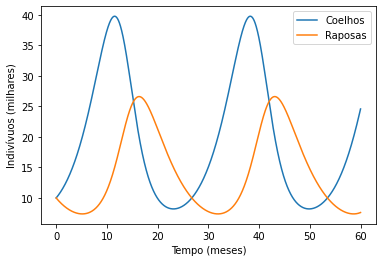

In [3]:
# Implemente seu código do Item 2 abaixo

# Condições iniciais
C_0 = 10
R_0 = 10
x_0 = [C_0,R_0]

# Lista de tempo
dt = 0.01
t = np.arange(0,60,dt)

# Função odeint
x = odeint(modelo,x_0,t)
C = x[:,0]
R = x[:,1]

# Plota resultados
plt.plot(t,C,label='Coelhos')
plt.plot(t,R,label='Raposas')
plt.xlabel('Tempo (meses)')
plt.ylabel('Indivívuos (milhares)')
plt.legend()
plt.show()

---

#### Item 3 (1,0 ponto)

Nas condições do **Item 2**, qual é população máxima de coelhos? Dê sua resposta na forma de um `print`.

In [4]:
# Implemente seu código do Item 3 abaixo

# Valor máximo
C_max = 0

# Loop para atualizar o valor máximo
for i in range(0,len(t)-1):
    if C[i]>C_max:
        C_max = C[i]

# Exibe valor máximo 
print('A população máxima de coelhos é de',int(C_max*1000),'indivíduos')

A população máxima de coelhos é de 39779 indivíduos


---

#### Item 4 (1,0 ponto)

Ainda nas condições do **Item 2**, quando (em que instante) a população máxima de coelhos é atingida pela primeira vez? Dê sua resposta na forma de um `print`, em meses, com duas casas decimais de precisão.

In [5]:
# Implemente seu código do Item 4 abaixo

# Instante de valor máximo
t_max = 0

# Loop para encontrar o instante de valor máximo
for i in range(0,len(t)-1):
    if C[i]==C_max:
        t_max = t[i]
        break
    
# Exibe instante de valor máximo
print('A população máxima é atingida após',t_max,'meses')

A população máxima é atingida após 11.52 meses


---

#### Item 5 (4,0 pontos)

Utilizando a função que você implementou no **Item 1** e as condições iniciais e lista de tempo do **Item 2** (**não copie os códigos novamente** no espaço a seguir), resolva o sistema de equações diferenciais novamente, porém agora utilizando o **método de Euler**. 

Em seguida, plote em uma **mesma** figura o gráfico de $C(t)$ por $t$ e o gráfico de $R(t)$ por $t$. 

*(Obs: caso você não consiga implementar o método de Euler utilizando a função do **Item 1**, você pode implementá-lo da forma que preferir. Porém, se você não usar a função do **Item 1**, este item valerá metade.)*

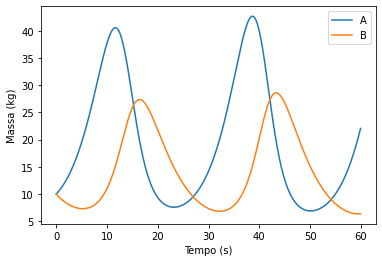

In [6]:
# Implemente seu código do Item 5 abaixo

# Condições iniciais
C_0 = 10
R_0 = 10
C = [C_0]
R = [R_0]

# Lista de tempo
dt = 0.1
t = np.arange(0,60,dt)

# Método de Euler
for i in range(0,len(t)-1):
    x = [C[i], R[i]]
    dxdt = modelo(x,t[i])
    dCdt = dxdt[0]
    dRdt = dxdt[1]
    C.append(C[i]+dCdt*dt)
    R.append(R[i]+dRdt*dt)
    
# Plota resultados
plt.plot(t,C,label='A')
plt.plot(t,R,label='B')
plt.xlabel('Tempo (s)')
plt.ylabel('Massa (kg)')
plt.legend()
plt.show()